# Complex integration

Different datasets adopt different ranges for miRNA values

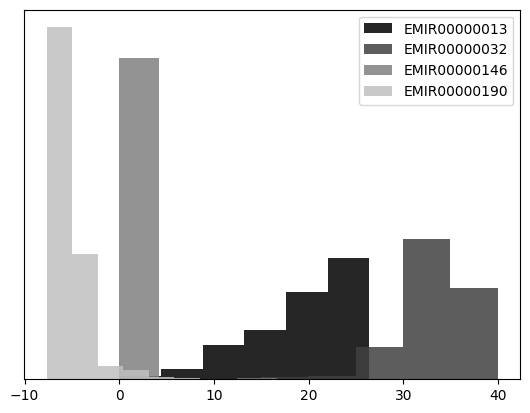

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


datasets = ['EMIR00000013', 'EMIR00000032', 'EMIR00000146', 'EMIR00000190']
for i, filename in enumerate([f'data/raw/exp/{d}_exp.csv' for d in datasets]):
    values = pd.read_csv(filename, index_col=0).values.flatten()
    plt.hist(values, bins=6, density=True, color=plt.cm.gray(i / len(datasets)), alpha=0.85, label=filename.split('/')[-1].split('_')[0])
plt.yticks([])
plt.legend()
plt.show()

# Dataset Selection

### [OpenRefine](https://openrefine.org)

- Retrieve platform technology from [Gene Expression Omnibus](https://0-www-ncbi-nlm-nih-gov.brum.beds.ac.uk/geo/browse/?view=platforms)

| Technology                 | Datasets  | Samples      |
| :------------------------- | --------: | -----------: |
| high-throughput sequencing | 64        | 1.473        |
| spotted oligonucleotide    | 35        | 24.119       |
| in situ oligonucleotide    | 61        | 2.987        |
| RT-PCR                     | 28        | 544          |
| other                      | 3         | 75           |
| ***Total***                | ***191*** | ***29.198*** |

- Delete anomalous datasets

| Dataset      | Reason                          |
| :----------- | :------------------------------ |
| EMIR00000005 | RT-PCR technology               |
| EMIR00000012 | RT-PCR technology               |
| EMIR00000013 | RT-PCR technology               |
| EMIR00000018 | RT-PCR technology               |
| EMIR00000024 | RT-PCR technology               |
| EMIR00000027 | RT-PCR technology               |
| EMIR00000031 | RT-PCR technology               |
| EMIR00000032 | RT-PCR technology               |
| EMIR00000037 | RT-PCR technology               |
| EMIR00000046 | RT-PCR technology               |
| EMIR00000050 | RT-PCR technology               |
| EMIR00000073 | RT-PCR technology               |
| EMIR00000083 | RT-PCR technology               |
| EMIR00000109 | RT-PCR technology               |
| EMIR00000120 | RT-PCR technology               |
| EMIR00000128 | RT-PCR technology               |
| EMIR00000132 | RT-PCR technology               |
| EMIR00000134 | RT-PCR technology               |
| EMIR00000136 | RT-PCR technology               |
| EMIR00000138 | RT-PCR technology               |
| EMIR00000139 | RT-PCR technology               |
| EMIR00000140 | RT-PCR technology               |
| EMIR00000141 | RT-PCR technology               |
| EMIR00000146 | RT-PCR technology               |
| EMIR00000150 | RT-PCR technology               |
| EMIR00000151 | RT-PCR technology               |
| EMIR00000154 | RT-PCR technology               |
| EMIR00000157 | RT-PCR technology               |
| EMIR00000030 | Other technology                |
| EMIR00000041 | Other technology                |
| EMIR00000152 | Other technology                |
| EMIR00000180 | Inconsistency with EMIR00000177 |
| EMIR00000091 | Subsets of EMIR00000102         |
| EMIR00000092 | Subsets of EMIR00000102         |
| EMIR00000097 | Subsets of EMIR00000102         |
| EMIR00000101 | Subsets of EMIR00000102         |
| EMIR00000010 | Not related to diseases         |
| EMIR00000011 | Not related to diseases         |
| EMIR00000023 | Not related to diseases         |
| EMIR00000026 | Not related to diseases         |
| EMIR00000028 | Not related to diseases         |
| EMIR00000038 | Not related to diseases         |
| EMIR00000081 | Not related to diseases         |
| EMIR00000095 | Not related to diseases         |
| EMIR00000096 | Not related to diseases         |
| EMIR00000123 | Not related to diseases         |
| EMIR00000133 | Not related to diseases         |
| EMIR00000137 | Not related to diseases         |
| EMIR00000158 | Not related to diseases         |

# Metadata Preprocessing

### [OpenRefine](https://openrefine.org)

- Concatenate metadata files into a single table

- Delete anomalous samples

| Reason                                  | Number  |
| :-------------------------------------- | ------: |
| Organism ≠ homo sapiens                 | 18      |
| Channel count ≠ 1                       | 189     |
| Molecule ≠ total RNA                    | 2       |
| Disease status not clear (EMIR00000090) | 13      |
| Disease status not clear (EMIR00000008) | 4       |
| Disease status not clear (EMIR00000067) | 3       |
| Disease status not clear (EMIR00000102) | 30      |
| Disease status not clear (EMIR00000166) | 9       |
| Disease status not clear (EMIR00000168) | 9       |

- Split and transpose *key:value* features

- Merge equivalent features associated to different datasets

- Rename features consistently

- Delete irrelevant or redundant features (e.g. *state* has an almost 1:1 relationship with *city*)

- Delete features where missing values ⪆ 98%

- Add dataset-level features

- Refine dataset-level features (based on majority class) using sample-level data
        
- Detect healthy samples in each dataset

- Standardize *age*, *sex*, *city* and *disease*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


metadata = pd.read_csv('data/PD.csv', index_col=0)

# Delete samples whose disease occurs less than 5 times in a dataset
metadata = metadata[metadata.groupby(['dataset', 'disease']).disease.transform('size') >= 5]

# Delete datasets with a unique disease value
to_remove = [index for index, value in (metadata.groupby('dataset').disease.nunique() == 1).items() if value]
metadata = metadata[~metadata.dataset.isin(to_remove)]

# Split samples into training and test set, stratifying by 'dataset' and 'disease' columns
train_index, test_index = train_test_split(metadata.index, test_size=0.2, random_state=42, stratify=metadata[['dataset', 'disease']])
metadata.loc[train_index, 'test'] = False
metadata.loc[test_index, 'test'] = True

metadata = metadata.sort_index()
metadata.to_csv('data/PD.csv')
metadata

,dataset,technology,country,city,sample_type,sex,age,disease,test
sample_id,,,,,,,,,
GSM1081746,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,63.0,Breast cancer,False
GSM1081747,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,46.0,Healthy control,False
GSM1081748,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,44.0,Breast cancer,False
GSM1081749,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,65.0,Healthy control,False
GSM1081750,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,59.0,Healthy control,False
...,...,...,...,...,...,...,...,...,...
GSM989224,EMIR00000102,in situ oligonucleotide,Japan,Chuo-ku,Serum derived exosomes,M,55.0,Colorectal cancer,False
GSM989225,EMIR00000102,in situ oligonucleotide,Japan,Chuo-ku,Serum derived exosomes,M,64.0,Colorectal cancer,False
GSM989226,EMIR00000102,in situ oligonucleotide,Japan,Chuo-ku,Serum derived exosomes,M,51.0,Colorectal cancer,False


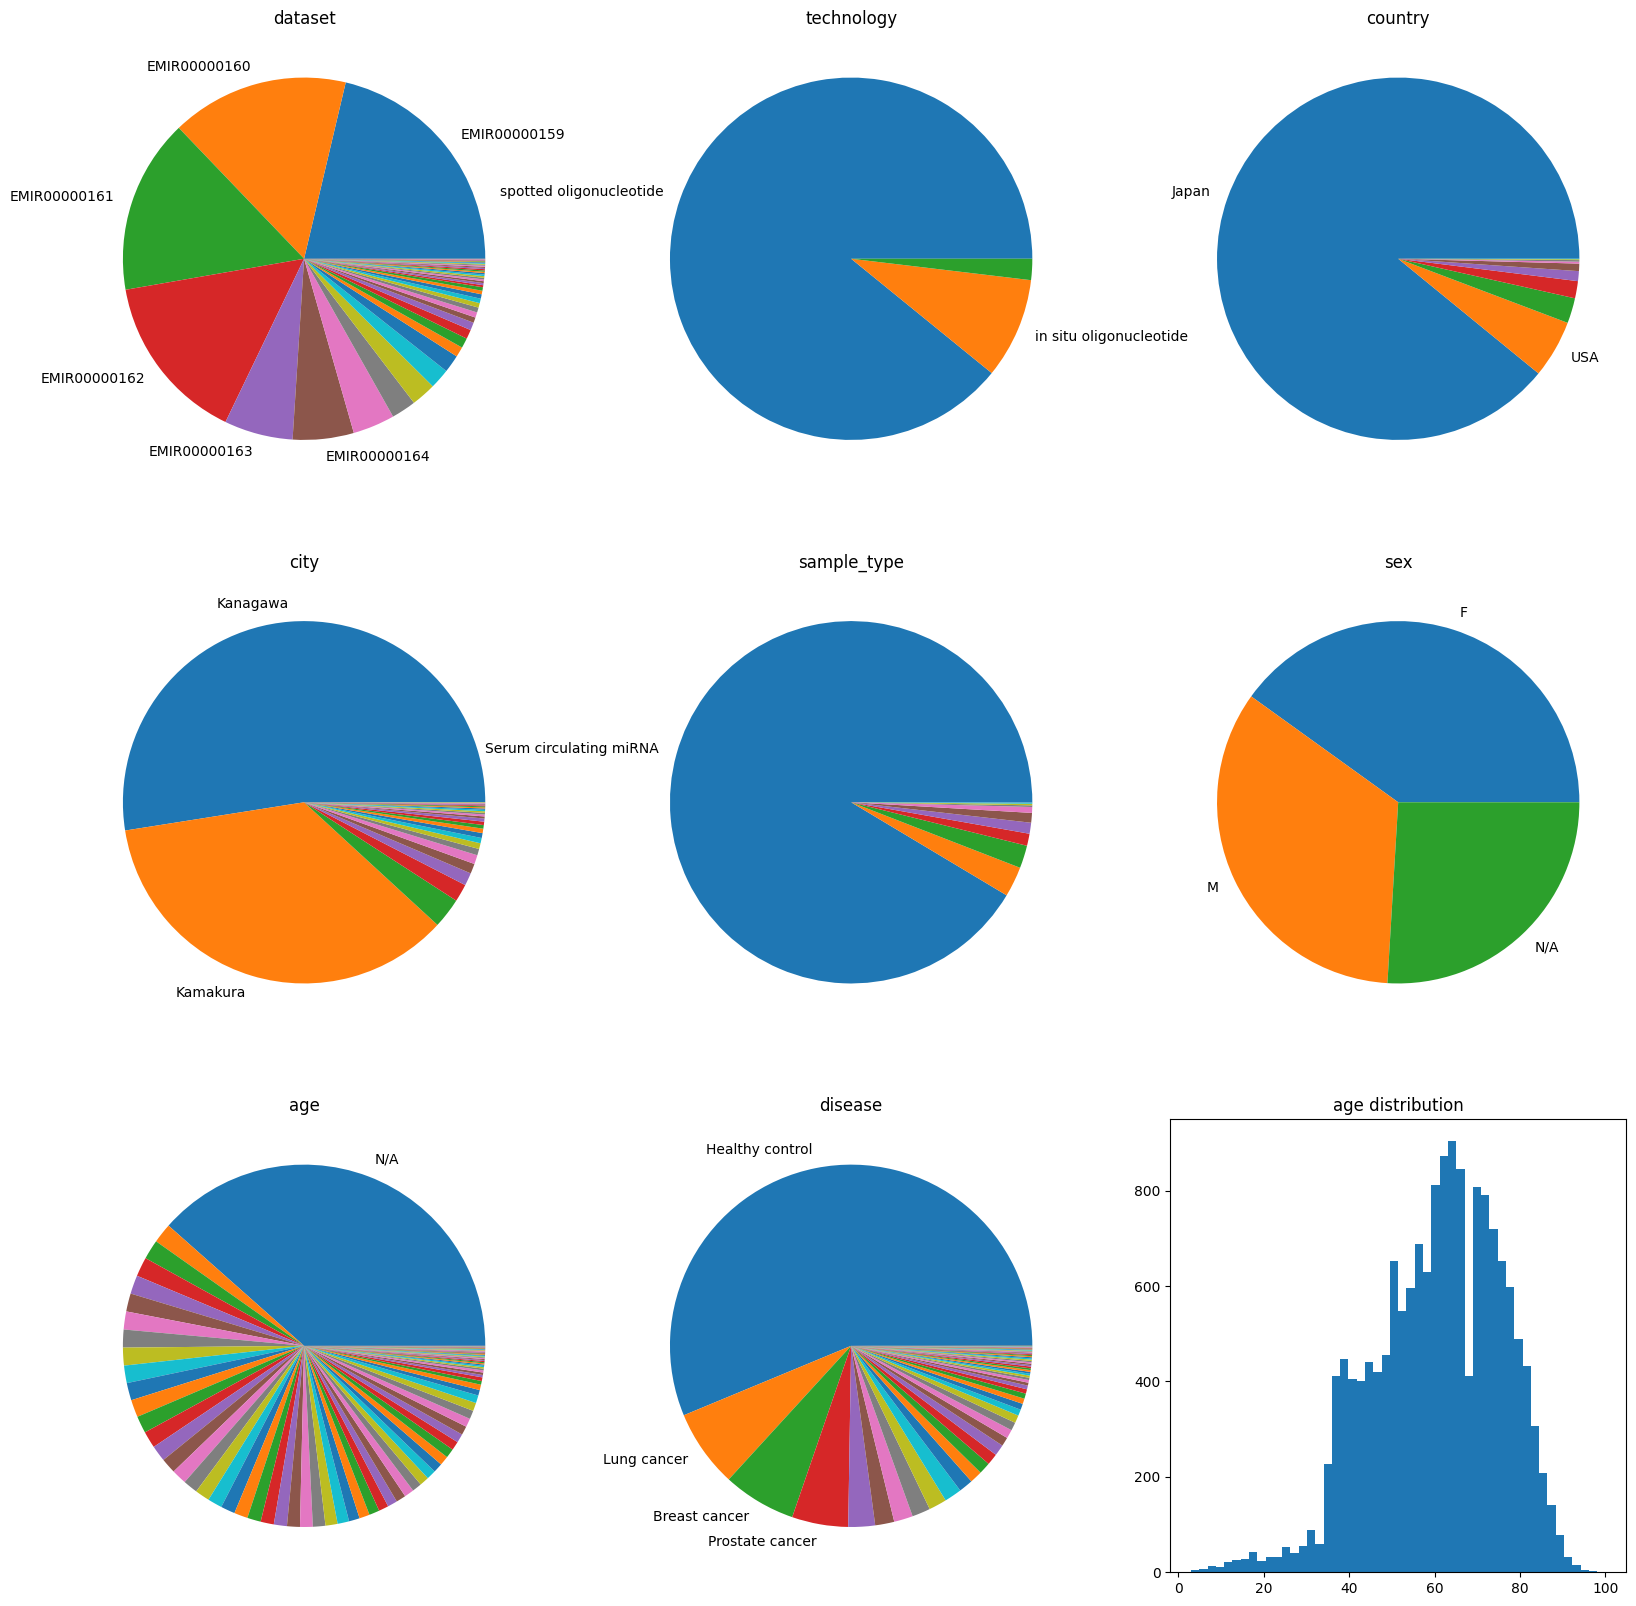

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


metadata = pd.read_csv('data/PD.csv', index_col=0).iloc[:,:-1]

# Visualize feature distribution
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
for i, column in enumerate(metadata.columns):
    counts = metadata[column].value_counts(dropna=False)
    labels = [label if count > 1000 else '' for count, label in zip(counts, counts.index)]
    labels = ['N/A' if pd.isnull(label) else label for label in labels]
    axs[i//3, i%3].set_title(f'{column}')
    axs[i//3, i%3].pie(counts, labels=labels)

axs[-1, -1].set_title('age distribution')
axs[-1, -1].hist(metadata.age, bins=50)
plt.show()

# miRNA Preprocessing

### [miRBaseConverter](https://taoshengxu.shinyapps.io/mirbaseconverter/)

- Convert miRNA names to miRBase latest version

- Retrieve miRNA sequence

In [ ]:
import pandas as pd


mirna = pd.read_csv('data/miRNA.tsv', sep='\t')
name_converter = dict(zip(mirna.OriginalName, mirna.miRNAName_v22))

def convert_miRNA_name(name):
    name = name.strip()
    name = name.split('_v1')[0]
    name = name.split('_v2')[0]
    return name_converter[name]

values = []
datasets = pd.read_csv('data/PD.csv').groupby('dataset').sample_id.agg(list).to_dict()
for dataset, samples in datasets.items():

    # Strip, remove version suffix and update miRNA names
    df = pd.read_csv(f'data/raw/exp/{dataset}_exp.csv', converters={0: convert_miRNA_name})

    # Delete unknown miRNA
    df.dropna(subset=df.columns[0], inplace=True)

    # Delete repeated miRNA (anomaly)
    df.drop_duplicates(df.columns[0], inplace=True)

    # Transpose data
    df = df.set_index(df.columns[0]).T.rename_axis('sample_id')

    # Delete samples not included in metadata
    df = df.loc[samples]
    values.append(df)

# Concatenate data into a single dataframe
values = pd.concat(values)

values = values.sort_index()
values.to_csv('data/EXP.csv')
values

Unnamed: 0,hsa-miR-486-5p,hsa-miR-122-5p,hsa-miR-423-5p,hsa-miR-451a,hsa-miR-92a-3p,hsa-let-7b-5p,hsa-miR-10b-5p,hsa-miR-320a-3p,hsa-miR-10a-5p,hsa-miR-99a-5p,...,hsa-miR-135a-2-3p,hsa-miR-137-5p,hsa-miR-147b-5p,hsa-miR-190b-3p,hsa-miR-1912-5p,hsa-miR-196a-1-3p,hsa-miR-217-3p,hsa-miR-320a-5p,hsa-miR-375-5p,hsa-miR-519a-2-5p
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM1081746,9.842000,5.740000,5.353000,8.016000,8.976000,8.951,1.692000,8.147000,1.920000,1.661000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081747,9.722000,5.899000,4.476000,9.125000,9.184000,9.527,2.667000,7.005000,1.938000,2.192000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081748,8.466000,2.251000,3.964000,8.583000,7.229000,8.788,2.683000,7.042000,2.152000,2.518000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081749,3.725000,1.160000,1.191000,6.584000,2.629000,2.062,2.846000,2.292000,2.531000,2.205000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081750,9.960000,2.170000,3.698000,8.743000,8.927000,8.476,2.306000,7.787000,2.123000,2.136000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM989224,1.286828,3.055074,-1.108253,6.686869,3.133780,NaN,2.926098,2.566769,1.178645,1.815485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM989225,1.531735,2.124445,0.828513,6.165665,2.046011,NaN,1.184656,5.003374,1.570707,0.241790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM989226,10.537140,1.892556,2.907918,4.585476,0.199452,NaN,0.775037,4.468402,1.110949,1.030714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Graph Construction

### [RNABERT](https://github.com/mana438/RNABERT)

In [ ]:
import pandas as pd
import torch
from collections import OrderedDict
from RNABERT.bert import get_config, BertModel, BertForMaskedLM


config = get_config('RNABERT/RNA_bert_config.json')
config.hidden_size = config.num_attention_heads * config.multiple

model = BertModel(config)
model = BertForMaskedLM(config, model).eval()

state_dict = torch.load('RNABERT/bert_mul_2.pth', map_location='cpu')
model.load_state_dict(OrderedDict((key[7:], value) for key, value in state_dict.items()))

mirna = pd.read_csv('data/miRNA.tsv', sep='\t').dropna()
mirna = dict(zip(mirna.miRNAName_v22, mirna.miRNASequence_v22))

# Compute embeddings for miRNA sequences
mapping = {'A': 2, 'U': 3, 'G': 4, 'C': 5}
for name, sequence in mirna.items():
    input = [mapping[c] for c in sequence] + [0] * (config.max_position_embeddings - len(sequence))
    encoded_layers = model(torch.tensor([input]))[-1]
    mirna[name] = torch.mean(encoded_layers[0], dim=0).detach().numpy()

torch.save(mirna, 'artifacts/miRNA.pt')

### [PyTorch Geometric](https://pyg.org)

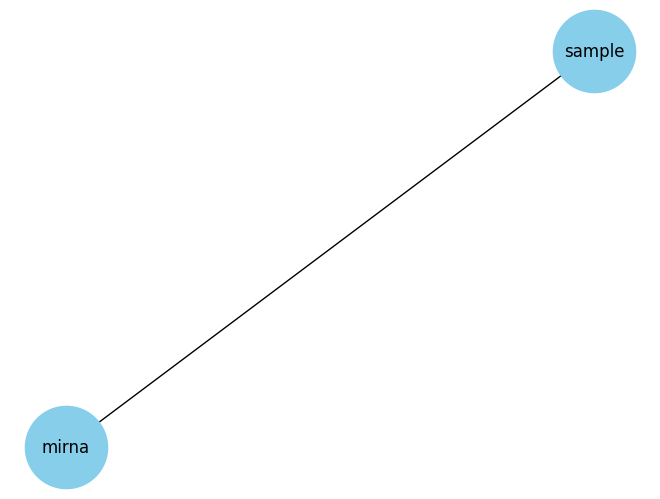


Node number
sample                             : 25957
mirna                              : 2588

Edge number
('sample', 'to', 'mirna')          : 61230421
('mirna', 'rev_to', 'sample')      : 61230421

Node features
sample                             : 104
mirna                              : 120

Edge features
('sample', 'to', 'mirna')          : 1
('mirna', 'rev_to', 'sample')      : 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
from sklearn.preprocessing import minmax_scale
from torch_geometric.data import HeteroData
from torch_geometric.transforms import ToUndirected


data = HeteroData()
metadata = pd.read_csv('data/PD.csv', index_col=0).reset_index(drop=True)
values = pd.read_csv('data/EXP.csv', index_col=0).reset_index(drop=True)

# Set features for 'sample' nodes
xs = torch.tensor(pd.get_dummies(metadata[['dataset', 'technology', 'country', 'city', 'sample_type', 'sex']]).values, dtype=torch.float)
age = torch.tensor(np.nan_to_num(minmax_scale(metadata.age), nan=-1), dtype=torch.float).unsqueeze(1)
data['sample'].x = torch.cat((xs, age), dim=1)

# Set class labels for 'sample' nodes
data['sample'].y = torch.tensor(metadata.disease.factorize()[0])

# Set train and test masks for 'sample' nodes
data['sample'].train_mask = torch.tensor(~metadata.test)
data['sample'].test_mask = torch.tensor(metadata.test)

# Set features for 'mirna' nodes
embeddings = torch.load('artifacts/miRNA.pt')
data['mirna'].x = torch.tensor(np.array([embeddings[name] for name in values.columns]))

# Set edges
rows, cols = np.where(~np.isnan(values))
data['sample', 'mirna'].edge_index = torch.tensor(np.array([rows, cols]))

# Set edge features
data['sample', 'mirna'].edge_attr = torch.tensor(values.values[rows, cols], dtype=torch.float)

# Create undirected graph by adding reverse edges
data = ToUndirected()(data)

# Check that edge_index hold indices in the range [0, num_nodes-1]
data.validate(raise_on_error=True)

# Visualize graph schema
schema = nx.Graph()
schema.add_nodes_from(data.node_types)
schema.add_edges_from((e[0], e[2]) for e in data.edge_types)
nx.draw_kamada_kawai(schema, with_labels=True, node_color='skyblue', node_size=3500)
plt.show()

# Print graph properties
print(f'\033[1m\nNode number\033[0m')
for ntype in data.node_types:
   print(f'{ntype:<35}:', data[ntype].num_nodes)

print(f'\033[1m\nEdge number\033[0m')
for etype in data.edge_types:
   print(f'{str(etype):<35}:', data[etype].num_edges)

print(f'\033[1m\nNode features\033[0m')
for ntype in data.node_types:
   print(f'{ntype:<35}:', data[ntype].num_node_features)

print(f'\033[1m\nEdge features\033[0m')
for etype in data.edge_types:
   print(f'{str(etype):<35}:', data[etype].num_edge_features)

torch.save(data, 'artifacts/Graph.pt')

# Heterogenous Graph Neural Network

In [1]:
import torch
from torch_geometric.nn import GAT, to_hetero


data = torch.load('artifacts/Graph.pt')

# Initialize GNN
model = GAT(
    in_channels=(-1, -1),
    hidden_channels=64,
    num_layers=2,
    out_channels=len(data['sample'].y.unique()),
    v2=True,
    jk='cat',
    edge_dim=1,
    add_self_loops=False
)

# Convert homogenous GNN to heterogenous GNN
model = to_hetero(model, data.metadata(), aggr='mean')

# Replace forward method to return only 'sample' node predictions
forward = model.forward
model.forward = lambda *args, **kwargs: forward(*args, **kwargs)['sample']

## Training

In [7]:
import tqdm
from torch_geometric import seed_everything, compile
from torch_geometric.loader import NeighborLoader
from torch.nn.functional import cross_entropy


seed_everything(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
compile(model)
model.to(device)

# Define loader for mini-batch training
train_loader = NeighborLoader(
    data,
    input_nodes=('sample', data['sample'].train_mask),
    num_neighbors=[-1],
    subgraph_type='induced',
    batch_size=256,
    shuffle=True
)

# Perform mini-batch training
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()
for epoch in range(1, 201):
    total_loss = 0
    for batch in tqdm.tqdm(train_loader):
        batch = batch.to(device)
        optimizer.zero_grad()                                                               # Clear gradients
        out = model(batch.x_dict, batch.edge_index_dict, edge_attr=batch.edge_attr_dict)    # Perform a forward pass
        loss = cross_entropy(out, batch['sample'].y)                                        # Compute loss
        loss.backward()                                                                     # Derive gradients
        optimizer.step()                                                                    # Update parameters based on gradients
        total_loss += float(loss) * batch['sample'].batch_size
    total_loss /= int(data['sample'].train_mask.sum())
    print(f'Epoch: {epoch:03d}, Loss: {total_loss:.4f}')

    if epoch % 20 == 0:
        torch.save({
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'epoch': epoch,
            'loss': total_loss,
        }, 'artifacts/GAT.pt')

100%|██████████| 82/82 [00:40<00:00,  2.01it/s]


Epoch: 001, Loss: 1.7267


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 002, Loss: 1.1415


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 003, Loss: 0.9684


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 004, Loss: 0.7850


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 005, Loss: 0.6697


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 006, Loss: 0.6364


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 007, Loss: 0.5833


100%|██████████| 82/82 [00:42<00:00,  1.95it/s]


Epoch: 008, Loss: 0.5646


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 009, Loss: 0.5303


100%|██████████| 82/82 [00:40<00:00,  2.01it/s]


Epoch: 010, Loss: 0.5274


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 011, Loss: 0.5794


100%|██████████| 82/82 [00:42<00:00,  1.94it/s]


Epoch: 012, Loss: 0.5028


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 013, Loss: 0.4937


100%|██████████| 82/82 [00:41<00:00,  2.00it/s]


Epoch: 014, Loss: 0.4726


100%|██████████| 82/82 [00:42<00:00,  1.93it/s]


Epoch: 015, Loss: 0.4611


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 016, Loss: 0.4691


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 017, Loss: 0.4603


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 018, Loss: 0.4560


100%|██████████| 82/82 [00:41<00:00,  1.96it/s]


Epoch: 019, Loss: 0.4546


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 020, Loss: 0.4391


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 021, Loss: 0.4339


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 022, Loss: 0.4362


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 023, Loss: 0.4293


100%|██████████| 82/82 [00:40<00:00,  2.05it/s]


Epoch: 024, Loss: 0.4163


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 025, Loss: 0.4249


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 026, Loss: 0.4158


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 027, Loss: 0.4219


100%|██████████| 82/82 [00:39<00:00,  2.07it/s]


Epoch: 028, Loss: 0.4104


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 029, Loss: 0.4120


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 030, Loss: 0.4083


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 031, Loss: 0.4024


100%|██████████| 82/82 [00:38<00:00,  2.12it/s]


Epoch: 032, Loss: 0.3982


100%|██████████| 82/82 [00:39<00:00,  2.07it/s]


Epoch: 033, Loss: 0.3973


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 034, Loss: 0.3917


100%|██████████| 82/82 [00:41<00:00,  2.00it/s]


Epoch: 035, Loss: 0.3956


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 036, Loss: 0.3984


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 037, Loss: 0.3918


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 038, Loss: 0.3899


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 039, Loss: 0.3903


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 040, Loss: 0.3843


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 041, Loss: 0.3868


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 042, Loss: 0.3849


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 043, Loss: 0.3786


100%|██████████| 82/82 [00:39<00:00,  2.07it/s]


Epoch: 044, Loss: 0.3818


100%|██████████| 82/82 [00:39<00:00,  2.09it/s]


Epoch: 045, Loss: 0.3817


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 046, Loss: 0.3792


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 047, Loss: 0.3683


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 048, Loss: 0.3896


100%|██████████| 82/82 [00:41<00:00,  1.97it/s]


Epoch: 049, Loss: 0.3787


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 050, Loss: 0.3763


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 051, Loss: 0.3698


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 052, Loss: 0.3750


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 053, Loss: 0.3681


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 054, Loss: 0.3665


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 055, Loss: 0.3721


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 056, Loss: 0.3582


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 057, Loss: 0.3616


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 058, Loss: 0.3623


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 059, Loss: 0.3607


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 060, Loss: 0.3538


100%|██████████| 82/82 [00:41<00:00,  2.00it/s]


Epoch: 061, Loss: 0.3598


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 062, Loss: 0.3591


100%|██████████| 82/82 [00:39<00:00,  2.09it/s]


Epoch: 063, Loss: 0.3515


100%|██████████| 82/82 [00:40<00:00,  2.01it/s]


Epoch: 064, Loss: 0.3516


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 065, Loss: 0.3504


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 066, Loss: 0.3490


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 067, Loss: 0.3554


100%|██████████| 82/82 [00:41<00:00,  1.97it/s]


Epoch: 068, Loss: 0.3495


100%|██████████| 82/82 [00:39<00:00,  2.09it/s]


Epoch: 069, Loss: 0.3448


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 070, Loss: 0.3466


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 071, Loss: 0.3535


100%|██████████| 82/82 [00:41<00:00,  1.96it/s]


Epoch: 072, Loss: 0.3396


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 073, Loss: 0.3504


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 074, Loss: 0.3502


100%|██████████| 82/82 [00:40<00:00,  2.00it/s]


Epoch: 075, Loss: 0.3372


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 076, Loss: 0.3414


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 077, Loss: 0.3388


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 078, Loss: 0.3365


100%|██████████| 82/82 [00:41<00:00,  1.98it/s]


Epoch: 079, Loss: 0.3311


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 080, Loss: 0.3388


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 081, Loss: 0.3500


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 082, Loss: 0.3321


100%|██████████| 82/82 [00:41<00:00,  1.97it/s]


Epoch: 083, Loss: 0.3401


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 084, Loss: 0.3352


100%|██████████| 82/82 [00:40<00:00,  2.01it/s]


Epoch: 085, Loss: 0.3321


100%|██████████| 82/82 [00:40<00:00,  2.00it/s]


Epoch: 086, Loss: 0.3286


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 087, Loss: 0.3273


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 088, Loss: 0.3261


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 089, Loss: 0.3394


100%|██████████| 82/82 [00:41<00:00,  2.00it/s]


Epoch: 090, Loss: 0.3289


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 091, Loss: 0.3360


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 092, Loss: 0.3293


100%|██████████| 82/82 [00:41<00:00,  1.96it/s]


Epoch: 093, Loss: 0.3246


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 094, Loss: 0.3243


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 095, Loss: 0.3292


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 096, Loss: 0.3224


100%|██████████| 82/82 [00:41<00:00,  1.97it/s]


Epoch: 097, Loss: 0.3362


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 098, Loss: 0.3225


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 099, Loss: 0.3215


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 100, Loss: 0.3493


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 101, Loss: 0.3248


100%|██████████| 82/82 [00:39<00:00,  2.07it/s]


Epoch: 102, Loss: 0.3139


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 103, Loss: 0.3131


100%|██████████| 82/82 [00:41<00:00,  1.97it/s]


Epoch: 104, Loss: 0.3315


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 105, Loss: 0.3228


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 106, Loss: 0.3243


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 107, Loss: 0.3074


100%|██████████| 82/82 [00:41<00:00,  1.97it/s]


Epoch: 108, Loss: 0.3118


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 109, Loss: 0.3099


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 110, Loss: 0.3072


100%|██████████| 82/82 [00:42<00:00,  1.95it/s]


Epoch: 111, Loss: 0.3228


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 112, Loss: 0.3050


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 113, Loss: 0.3107


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 114, Loss: 0.3113


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 115, Loss: 0.3065


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 116, Loss: 0.3205


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 117, Loss: 0.3091


100%|██████████| 82/82 [00:41<00:00,  1.96it/s]


Epoch: 118, Loss: 0.3044


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 119, Loss: 0.3156


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 120, Loss: 0.3101


100%|██████████| 82/82 [00:39<00:00,  2.10it/s]


Epoch: 121, Loss: 0.3062


100%|██████████| 82/82 [00:41<00:00,  1.97it/s]


Epoch: 122, Loss: 0.3046


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 123, Loss: 0.3013


100%|██████████| 82/82 [00:40<00:00,  2.05it/s]


Epoch: 124, Loss: 0.3035


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 125, Loss: 0.3156


100%|██████████| 82/82 [00:41<00:00,  1.96it/s]


Epoch: 126, Loss: 0.3052


100%|██████████| 82/82 [00:39<00:00,  2.07it/s]


Epoch: 127, Loss: 0.2977


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 128, Loss: 0.3105


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 129, Loss: 0.2996


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 130, Loss: 0.2987


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 131, Loss: 0.3082


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 132, Loss: 0.2947


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 133, Loss: 0.2971


100%|██████████| 82/82 [00:39<00:00,  2.07it/s]


Epoch: 134, Loss: 0.3026


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 135, Loss: 0.3006


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 136, Loss: 0.2937


100%|██████████| 82/82 [00:41<00:00,  1.98it/s]


Epoch: 137, Loss: 0.3036


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 138, Loss: 0.3011


100%|██████████| 82/82 [00:40<00:00,  2.03it/s]


Epoch: 139, Loss: 0.2948


100%|██████████| 82/82 [00:41<00:00,  1.98it/s]


Epoch: 140, Loss: 0.2957


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 141, Loss: 0.2880


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 142, Loss: 0.2960


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 143, Loss: 0.2968


100%|██████████| 82/82 [00:41<00:00,  1.98it/s]


Epoch: 144, Loss: 0.2948


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 145, Loss: 0.2879


100%|██████████| 82/82 [00:40<00:00,  2.05it/s]


Epoch: 146, Loss: 0.2994


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 147, Loss: 0.2992


100%|██████████| 82/82 [00:40<00:00,  2.01it/s]


Epoch: 148, Loss: 0.2918


100%|██████████| 82/82 [00:40<00:00,  2.05it/s]


Epoch: 149, Loss: 0.3038


100%|██████████| 82/82 [00:40<00:00,  2.05it/s]


Epoch: 150, Loss: 0.2893


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 151, Loss: 0.2978


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 152, Loss: 0.2883


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 153, Loss: 0.2863


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 154, Loss: 0.2747


100%|██████████| 82/82 [00:41<00:00,  1.98it/s]


Epoch: 155, Loss: 0.2831


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 156, Loss: 0.2907


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 157, Loss: 0.2890


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 158, Loss: 0.2812


100%|██████████| 82/82 [00:41<00:00,  1.98it/s]


Epoch: 159, Loss: 0.2931


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 160, Loss: 0.2907


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 161, Loss: 0.2878


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 162, Loss: 0.2879


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 163, Loss: 0.2841


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 164, Loss: 0.2833


100%|██████████| 82/82 [00:40<00:00,  2.05it/s]


Epoch: 165, Loss: 0.2789


100%|██████████| 82/82 [00:41<00:00,  1.98it/s]


Epoch: 166, Loss: 0.2807


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 167, Loss: 0.2744


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 168, Loss: 0.2874


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 169, Loss: 0.2791


100%|██████████| 82/82 [00:42<00:00,  1.93it/s]


Epoch: 170, Loss: 0.2759


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 171, Loss: 0.2758


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 172, Loss: 0.2721


100%|██████████| 82/82 [00:38<00:00,  2.12it/s]


Epoch: 173, Loss: 0.2828


100%|██████████| 82/82 [00:40<00:00,  2.01it/s]


Epoch: 174, Loss: 0.2867


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 175, Loss: 0.2716


100%|██████████| 82/82 [00:40<00:00,  2.02it/s]


Epoch: 176, Loss: 0.2837


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 177, Loss: 0.2800


100%|██████████| 82/82 [00:41<00:00,  1.97it/s]


Epoch: 178, Loss: 0.2797


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 179, Loss: 0.2886


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 180, Loss: 0.2799


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 181, Loss: 0.2671


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 182, Loss: 0.2790


100%|██████████| 82/82 [00:40<00:00,  2.01it/s]


Epoch: 183, Loss: 0.2840


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 184, Loss: 0.2971


100%|██████████| 82/82 [00:41<00:00,  1.98it/s]


Epoch: 185, Loss: 0.2754


100%|██████████| 82/82 [00:39<00:00,  2.05it/s]


Epoch: 186, Loss: 0.2744


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 187, Loss: 0.2854


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 188, Loss: 0.2710


100%|██████████| 82/82 [00:41<00:00,  1.98it/s]


Epoch: 189, Loss: 0.2781


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 190, Loss: 0.2744


100%|██████████| 82/82 [00:40<00:00,  2.05it/s]


Epoch: 191, Loss: 0.2786


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 192, Loss: 0.2691


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 193, Loss: 0.2841


100%|██████████| 82/82 [00:40<00:00,  2.05it/s]


Epoch: 194, Loss: 0.2773


100%|██████████| 82/82 [00:39<00:00,  2.08it/s]


Epoch: 195, Loss: 0.2896


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 196, Loss: 0.2800


100%|██████████| 82/82 [00:41<00:00,  1.99it/s]


Epoch: 197, Loss: 0.2706


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]


Epoch: 198, Loss: 0.2652


100%|██████████| 82/82 [00:39<00:00,  2.06it/s]


Epoch: 199, Loss: 0.2674


100%|██████████| 82/82 [00:40<00:00,  2.04it/s]

Epoch: 200, Loss: 0.2706


## Evaluation

### [Captum](https://captum.ai)

Overall Accuracy : 0.88		Support : 5192


,Sensitivity,Specificity,Informedness,Support,Relevant miRNAs
Liver cancer,1.00,1.00,1.00,10,"{'hsa-miR-4433a-5p': 0.049, 'hsa-miR-4438': 0...."
Small cell lung carcinoma,1.00,1.00,1.00,1,"{'hsa-miR-1183': 0.859, 'hsa-miR-3166': 0.581,..."
Oral squamous cell cancer,1.00,1.00,1.00,5,"{'hsa-miR-195-5p': 0.349, 'hsa-miR-1248': 0.10..."
Chronic pancreatitis,1.00,1.00,1.00,2,"{'hsa-miR-6079': 4.212, 'hsa-miR-1296-5p': 0.0..."
Fulminant myocarditis,1.00,1.00,1.00,1,"{'hsa-miR-6079': 1.493, 'hsa-miR-7107-3p': 1.3..."
Ventricular septal defect in the fetus,1.00,1.00,1.00,2,"{'hsa-miR-195-5p': 1.304, 'hsa-miR-296-5p': 0...."
Lung cancer (post-operation),0.97,1.00,0.97,36,"{'hsa-miR-6716-3p': 0.076, 'hsa-miR-6884-3p': ..."
Esophageal squamous cell carcinoma,0.97,1.00,0.97,123,"{'hsa-miR-195-5p': 0.24, 'hsa-miR-1227-3p': 0...."
Lung cancer,0.94,0.98,0.92,360,"{'hsa-miR-6884-3p': 0.093, 'hsa-miR-6716-3p': ..."
Non-alcoholic steatohepatitis,1.00,0.87,0.87,1,"{'hsa-miR-1183': 1.253, 'hsa-let-7c': 1.138, '..."


,Sensitivity,Specificity,Informedness,Support
Macro Avg,0.56,0.85,0.41,2271
Weighted Avg,0.76,0.90,0.66,2271


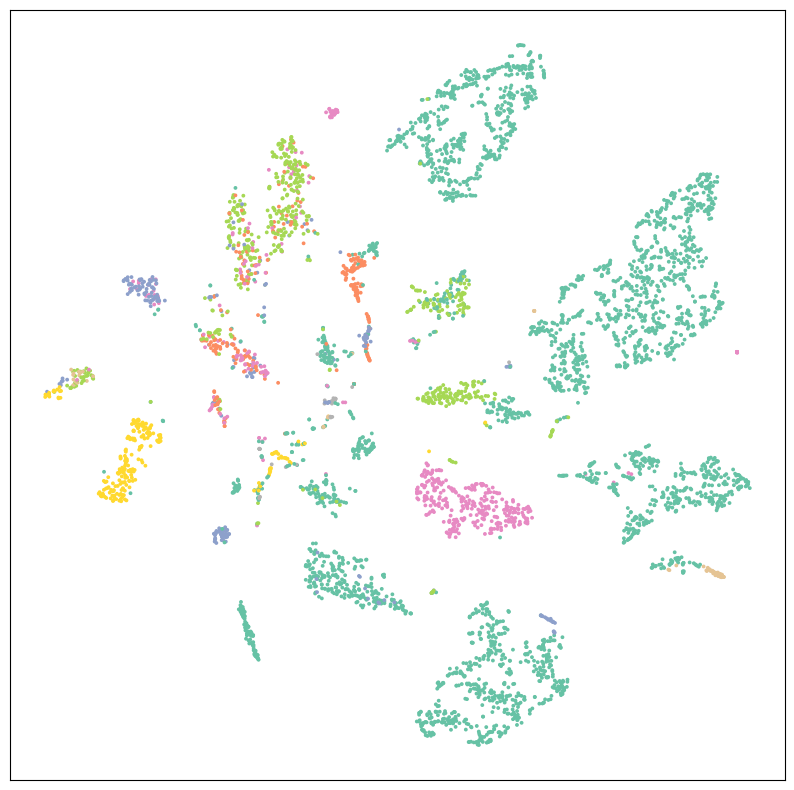

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, recall_score
from torch_geometric.explain import Explainer, CaptumExplainer


metadata = pd.read_csv('data/PD.csv', index_col=0)
values = pd.read_csv('data/EXP.csv', index_col=0)
disease_names = metadata.disease.unique().tolist()

checkpoint = torch.load('artifacts/GAT.pt', map_location='cpu')
model.load_state_dict(checkpoint['model'])
test_data = data.subgraph({'sample': data['sample'].test_mask})
with torch.no_grad():
    model.eval()
    out = model(test_data.x_dict, test_data.edge_index_dict, edge_attr=test_data.edge_attr_dict)

# Compute overall accuracy
y_true = metadata[metadata.test].disease
y_pred = pd.Categorical.from_codes(out.argmax(dim=1).numpy(), disease_names)
accuracy = accuracy_score(y_true, y_pred)
print(f'\033[1mOverall Accuracy\033[0m : {accuracy:.2f}\t\t\033[1mSupport\033[0m : {len(y_true)}')

# Instantiate Captum explainer and use Integrated Gradients as approximations of the importance of the edges
explainer = Explainer(
    model=model,
    algorithm=CaptumExplainer('IntegratedGradients'),
    explanation_type='phenomenon',
    edge_mask_type='object',
    model_config=dict(mode='multiclass_classification', task_level='node', return_type='raw')
)
subgraph = test_data.subgraph({'sample': test_data['sample'].y != disease_names.index('Healthy control')})
explanation = explainer(
    subgraph.x_dict,
    subgraph.edge_index_dict,
    edge_attr=subgraph.edge_attr_dict,
    target=subgraph['sample'].y,
    index=torch.arange(subgraph['sample'].num_nodes)
)
edge_index = subgraph['mirna', 'rev_to', 'sample'].edge_index
edge_weight = explanation.edge_mask_dict['mirna', 'rev_to', 'sample']

# Evaluate results for each disease
results = {}
for disease, datasets in metadata.groupby('disease').dataset.agg(set).items():
    if disease != 'Healthy control':

        # Compute sensitivity: TP/P
        sensitivity = recall_score(y_true == disease, y_pred == disease)

        # Compute  specificity: TN/N. TN are selected only from datasets containing the disease
        sample_mask = metadata[metadata.test].dataset.isin(datasets)
        specificity = recall_score(y_true[sample_mask] == disease, y_pred[sample_mask] == disease, pos_label=False)

        # Compute average importance for each miRNA
        importance = {}
        samples = torch.nonzero(subgraph['sample'].y == disease_names.index(disease)).squeeze()
        edge_mask = torch.isin(edge_index[1], samples)
        for mirna, value in zip(edge_index[0][edge_mask], edge_weight[edge_mask]):
            importance.setdefault(mirna.item(), []).append(value.item())
        importance = {k: np.mean(v) for k, v in importance.items()}

        # Select miRNAs with average importance > Q3 + 1.5 * (Q3 - Q1)
        q1, q3 = np.percentile(list(importance.values()), [25, 75])
        relevant_mirna = {values.columns[k]: round(v, 3) for k, v in importance.items() if v > q3 + 1.5 * (q3 - q1)}

        # Sort selected miRNAs and keep only the top 20
        relevant_mirna = dict(sorted(relevant_mirna.items(), key=lambda item: item[1], reverse=True)[:20])

        results[disease] = {
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'Informedness': sensitivity + specificity - 1,
            'Support': sum(y_true == disease),
            'Relevant miRNAs': relevant_mirna
        }

# Sort diseases by informedness score
results = pd.DataFrame(results).T.sort_values('Informedness', ascending=False)
results = results.astype({'Sensitivity': float, 'Specificity': float, 'Informedness': float}).round(2)
results.to_csv('results/GAT.csv')

# Compute average scores
averages = pd.DataFrame({
    'Sensitivity': (results.Sensitivity.mean(), sum(results.Sensitivity * results.Support) / sum(results.Support)),
    'Specificity': (results.Specificity.mean(), sum(results.Specificity * results.Support) / sum(results.Support)),
    'Informedness': (results.Informedness.mean(), sum(results.Informedness * results.Support) / sum(results.Support)),
    'Support': (sum(results.Support), sum(results.Support))
}, index=['Macro Avg', 'Weighted Avg']).round(2)

pd.set_option('display.max_rows', 100)
display(results)
display(averages)

# Project sample embeddings in a two-dimensional space
z = TSNE(n_components=2).fit_transform(out.numpy())
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.scatter(z[:,0], z[:,1], s=3, c=test_data['sample'].y, cmap='Set2')
plt.show()

# Bagging Classifier

## Training

In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import BaggingClassifier


metadata = pd.read_csv('data/PD.csv', index_col=0)
values = pd.read_csv('data/EXP.csv', index_col=0)

X = values.merge(metadata[['dataset', 'technology', 'country', 'city', 'sample_type', 'sex',  'age']], left_index=True, right_index=True)
X = pd.get_dummies(X)
X_train = X[~metadata.test]
y_train = metadata[~metadata.test].disease

model = BaggingClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, 'artifacts/Bagging.joblib');

## Evaluation

In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from sklearn.inspection import permutation_importance


metadata = pd.read_csv('data/PD.csv', index_col=0)
values = pd.read_csv('data/EXP.csv', index_col=0)
model = joblib.load('artifacts/Bagging.joblib')

X = values.merge(metadata[['dataset', 'technology', 'country', 'city', 'sample_type', 'sex',  'age']], left_index=True, right_index=True)
X = pd.get_dummies(X)
X_test = X[metadata.test]

# Compute overall accuracy
y_true = metadata[metadata.test].disease
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true, y_pred)
print(f'\033[1mOverall Accuracy\033[0m : {accuracy:.2f}\t\t\033[1mSupport\033[0m : {len(y_true)}')

# Evaluate results for each disease
results = {}
scoring = {}
for disease, datasets in metadata.groupby('disease').dataset.agg(set).items():
    if disease != 'Healthy control':

        # Compute sensitivity: TP/P
        sensitivity = recall_score(y_true == disease, y_pred == disease)

        # Compute  specificity: TN/N. TN are selected only from datasets containing the disease
        sample_mask = metadata[metadata.test].dataset.isin(datasets)
        specificity = recall_score(y_true[sample_mask] == disease, y_pred[sample_mask] == disease, pos_label=False)

        results[disease] = {
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'Informedness': sensitivity + specificity - 1,
            'Support': sum(y_true == disease)
        }

        # Define scoring function for permutation importance based on informedness
        scoring[disease] = make_scorer(lambda yt, yp, d=disease, m=sample_mask:
            recall_score(yt == d, yp == d) + recall_score(yt[m] == d, yp[m] == d, pos_label=False) - 1)

# Permutation feature importance is the decrease in the model score when a single feature value is randomly shuffled
# Compute permutation feature importance of miRNAs for each disease
importance = permutation_importance(model, X_test, y_true, scoring=scoring, n_repeats=3, random_state=42)
importance = {k: v.importances_mean[:len(values.columns)] for k, v in importance.items()}

# Select miRNAs with permutation feature importance > Q3 + 1.5 * (Q3 - Q1)
for disease, weights in importance.items():
    q1, q3 = np.percentile(weights, [25, 75])
    relevant_mirna = {k: round(v, 3) for k, v in zip(values.columns, weights) if v > q3 + 1.5 * (q3 - q1)}

    # Sort selected miRNAs and keep only the top 20
    relevant_mirna = dict(sorted(relevant_mirna.items(), key=lambda item: item[1], reverse=True)[:20])
    results[disease]['Relevant miRNAs'] = relevant_mirna

# Sort diseases by informedness score
results = pd.DataFrame(results).T.sort_values('Informedness', ascending=False)
results = results.astype({'Sensitivity': float, 'Specificity': float, 'Informedness': float}).round(2)
results.to_csv('results/Bagging.csv')

# Compute average scores
averages = pd.DataFrame({
    'Sensitivity': (results.Sensitivity.mean(), sum(results.Sensitivity * results.Support) / sum(results.Support)),
    'Specificity': (results.Specificity.mean(), sum(results.Specificity * results.Support) / sum(results.Support)),
    'Informedness': (results.Informedness.mean(), sum(results.Informedness * results.Support) / sum(results.Support)),
    'Support': (sum(results.Support), sum(results.Support))
}, index=['Macro Avg', 'Weighted Avg']).round(2)

pd.set_option('display.max_rows', 100)
display(results)
display(averages)

Overall Accuracy : 0.90		Support : 5192


,Sensitivity,Specificity,Informedness,Support,Relevant miRNAs
Oral squamous cell cancer,1.00,1.00,1.00,5,"{'hsa-miR-5100': 0.467, 'hsa-miR-1228-5p': 0.267}"
Lung cancer (post-operation),1.00,1.00,1.00,36,"{'hsa-miR-1228-5p': 0.528, 'hsa-miR-5100': 0.2..."
Chronic pancreatitis,1.00,1.00,1.00,2,"{'hsa-miR-1228-5p': 0.667, 'hsa-miR-3611': 0.5..."
Esophageal squamous cell carcinoma,0.97,1.00,0.96,123,"{'hsa-miR-5100': 0.711, 'hsa-miR-1228-5p': 0.5..."
Lung cancer,0.94,1.00,0.93,360,"{'hsa-miR-5100': 0.703, 'hsa-miR-1228-5p': 0.4..."
Ovarian cancer,0.91,0.96,0.88,81,"{'hsa-miR-5100': 0.621, 'hsa-miR-1228-5p': 0.3..."
Breast cancer,0.89,0.98,0.87,339,"{'hsa-miR-5100': 0.186, 'hsa-miR-1228-5p': 0.1..."
Wilms tumor (post chemotherapy),1.00,0.86,0.86,6,"{'hsa-miR-1225-5p': 0.857, 'hsa-miR-1228-5p': ..."
Glioma,0.88,0.98,0.85,58,"{'hsa-miR-5100': 0.502, 'hsa-miR-1228-5p': 0.1..."
Prostate cancer,0.97,0.87,0.84,261,"{'hsa-miR-5100': 0.49, 'hsa-miR-1228-5p': 0.42..."


,Sensitivity,Specificity,Informedness,Support
Macro Avg,0.5,0.87,0.37,2271
Weighted Avg,0.8,0.93,0.72,2271


# Comparison with Medical Literature

### [Human microRNA Disease Database](https://www.cuilab.cn/hmdd)

In [1]:
import pandas as pd
import json


hmdd = pd.read_csv('data/HMDD.tsv', sep='\t').groupby('disease').miRNA.agg(set)

# Map ExomiRHub diseases to HMDD diseases (not exact match)
disease_mapping = pd.read_csv('data/HMDD-Mapping.tsv', sep='\t')
disease_mapping = dict(zip(disease_mapping.ExomiRHub, disease_mapping.HMDD))

# Compare obtained results with experimentally supported miRNA-disease associations
associations = {}
gat_results = pd.read_csv(f'results/GAT.csv', index_col=0)['Relevant miRNAs']
bag_results = pd.read_csv(f'results/Bagging.csv', index_col=0)['Relevant miRNAs']
for disease in disease_mapping.keys():
    gat_mirna = json.loads(gat_results.loc[disease].replace("'", "\""))
    bag_mirna = json.loads(bag_results.loc[disease].replace("'", "\""))

    # Lowercase miRNA names and remove -3p and -5p suffixes to conform to HMDD conventions
    gat_mirna = set(m.split('-3p')[0].split('-5p')[0].lower() for m in gat_mirna)
    bag_mirna = set(m.split('-3p')[0].split('-5p')[0].lower() for m in bag_mirna)

    # Select miRNA-disease associations supported by HMDD
    gat_hmdd = gat_mirna.intersection(hmdd[disease_mapping[disease]])
    bag_hmdd = bag_mirna.intersection(hmdd[disease_mapping[disease]])
    associations[disease] = {
        'GAT Validated miRNAs': ', '.join(gat_hmdd),
        'Bagging Validated miRNAs': ', '.join(bag_hmdd)
    }

associations = pd.DataFrame(associations).T
associations.to_csv('results/Comparison.csv')
pd.set_option('display.max_rows', 100)
display(associations)

,GAT Validated miRNAs,Bagging Validated miRNAs
Acquired immune deficiency syndrome,"hsa-mir-296, hsa-mir-28, hsa-mir-181c",
Benign bone and soft tissue disease,hsa-mir-877,
Benign breast disease,,
Benign ovarian disease,,
Benign pancreatic or biliary tract diseases,,
Benign prostate disease,,
Benign thyroid nodule,,
Biliary tract cancer,,
Bladder cancer,hsa-mir-877,"hsa-mir-221, hsa-mir-16, hsa-mir-195"
Borderline ovarian tumor,"hsa-mir-877, hsa-mir-222, hsa-mir-195, hsa-mir...",
